In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
import tensorflow as tf


2023-11-21 09:29:17.129186: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import tensorflow as tf

In [4]:
data = 'animals'

In [5]:
categories = os.listdir(data)

In [6]:
categories

['panda', 'cats', 'dogs']

In [7]:
X, y = [], []

for category in categories:
    path = os.path.join(data, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        X.append(img_path)
        y.append(category)
        

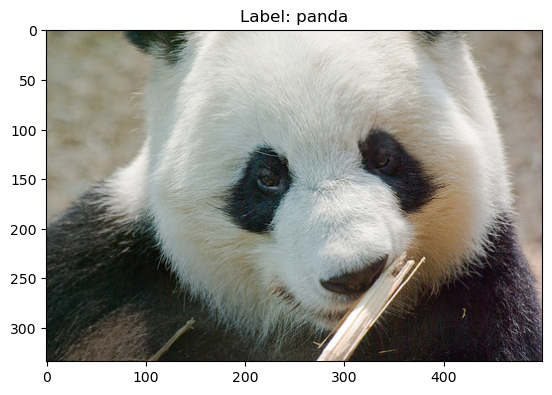

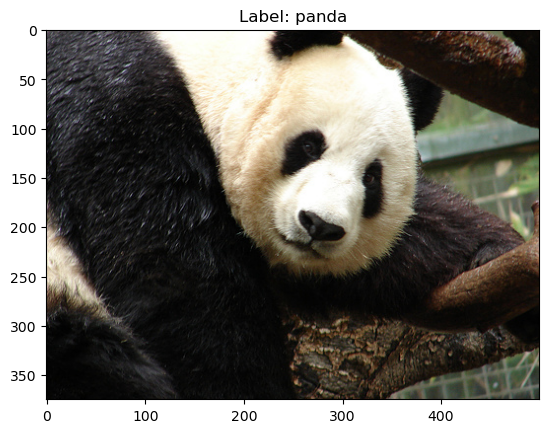

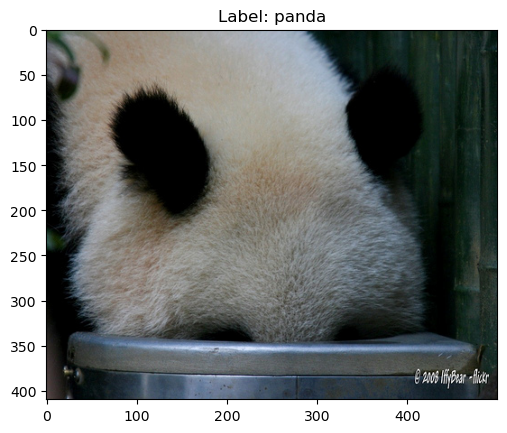

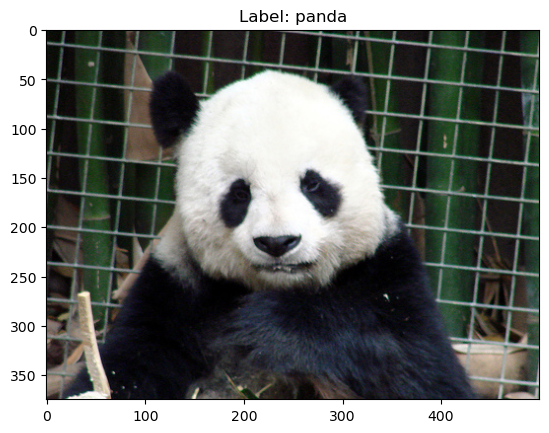

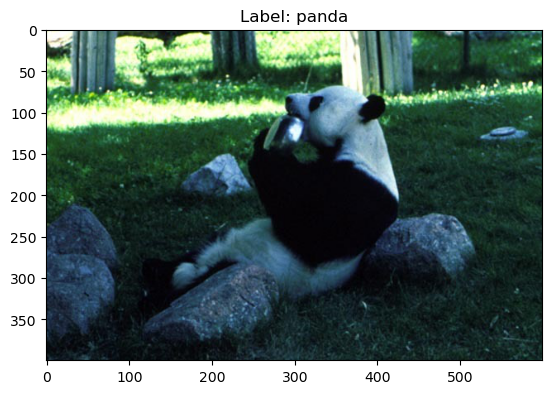

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Assuming you have already populated X and y
# X is a list of image paths, and y is a list of corresponding labels

# Display the first few images
num_images_to_display = 5

for i in range(num_images_to_display):
    img_path = X[i]
    label = y[i]

    # Load the image using Matplotlib
    img = mpimg.imread(img_path)

    # Display the image
    plt.imshow(img)
    plt.title(f'Label: {label}')
    plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=101)

In [12]:
train_df = pd.DataFrame({'FileName':X_train, 'Category':y_train})
test_df = pd.DataFrame({'FileName':X_test, 'Category':y_test})
val_df = pd.DataFrame({'FileName':X_val, 'Category':y_val})

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  shear_range=0.2,
                                  zoom_range=0.2)

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
training_set = train_datagen.flow_from_dataframe(train_df,
                                                x_col='FileName',
                                                y_col='Category',
                                                batch_size=32,
                                                class_mode='categorical',
                                                target_size=(64, 64))

Found 1470 validated image filenames belonging to 3 classes.


In [17]:
test_set = train_datagen.flow_from_dataframe(test_df,
                                                x_col='FileName',
                                                y_col='Category',
                                                batch_size=32,
                                                class_mode='categorical',
                                                target_size=(64, 64))

Found 900 validated image filenames belonging to 3 classes.


In [18]:
validation_set = train_datagen.flow_from_dataframe(val_df,
                                                x_col='FileName',
                                                y_col='Category',
                                                batch_size=128,
                                                class_mode='categorical',
                                                target_size=(64, 64))

Found 630 validated image filenames belonging to 3 classes.


In [19]:
cnn = tf.keras.models.Sequential()

2023-11-21 09:29:49.390387: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [20]:
#convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32,
                              kernel_size=3,
                              activation='relu',
                              input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=64,
                              kernel_size=3,
                              activation='relu',
                              input_shape=[64,64,3]))

In [21]:
#pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                 strides=2))

In [22]:
#second convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32,
                              kernel_size=3,
                              activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                 strides=2))

In [23]:
#flattern
cnn.add(tf.keras.layers.Flatten())

In [24]:
#full connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
#output layer
cnn.add(tf.keras.layers.Dense(units=len(categories), activation='sigmoid'))

In [25]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history=cnn.fit(x=training_set, validation_data=validation_set, epochs=100)

Epoch 1/100


2023-11-21 09:29:56.698947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


46/46 [==============================] - ETA: 0s - loss: 0.8924 - accuracy: 0.5408

2023-11-21 09:30:17.257298: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


46/46 [==============================] - 26s 536ms/step - loss: 0.8924 - accuracy: 0.5408 - val_loss: 0.7898 - val_accuracy: 0.5873
Epoch 2/100
46/46 [==============================] - 19s 414ms/step - loss: 0.7489 - accuracy: 0.6231 - val_loss: 0.7525 - val_accuracy: 0.6317
Epoch 3/100
46/46 [==============================] - 20s 447ms/step - loss: 0.6939 - accuracy: 0.6605 - val_loss: 0.7234 - val_accuracy: 0.6206
Epoch 4/100
46/46 [==============================] - 20s 436ms/step - loss: 0.6863 - accuracy: 0.6578 - val_loss: 0.7547 - val_accuracy: 0.6333
Epoch 5/100
46/46 [==============================] - 15s 332ms/step - loss: 0.6327 - accuracy: 0.6918 - val_loss: 0.6769 - val_accuracy: 0.6651
Epoch 6/100
46/46 [==============================] - 15s 319ms/step - loss: 0.5860 - accuracy: 0.7238 - val_loss: 0.6679 - val_accuracy: 0.6587
Epoch 7/100
46/46 [==============================] - 15s 325ms/step - loss: 0.5647 - accuracy: 0.7313 - val_loss: 0.6871 - val_accuracy: 0.6587
Epoc

46/46 [==============================] - 14s 314ms/step - loss: 0.0619 - accuracy: 0.9789 - val_loss: 1.4489 - val_accuracy: 0.7079
Epoch 58/100
46/46 [==============================] - 15s 329ms/step - loss: 0.0575 - accuracy: 0.9782 - val_loss: 1.5259 - val_accuracy: 0.7333
Epoch 59/100
46/46 [==============================] - 15s 330ms/step - loss: 0.0952 - accuracy: 0.9687 - val_loss: 1.4606 - val_accuracy: 0.6984
Epoch 60/100
46/46 [==============================] - 15s 324ms/step - loss: 0.0661 - accuracy: 0.9810 - val_loss: 1.3497 - val_accuracy: 0.7127
Epoch 61/100
46/46 [==============================] - 15s 326ms/step - loss: 0.0239 - accuracy: 0.9932 - val_loss: 1.5753 - val_accuracy: 0.7000
Epoch 62/100
46/46 [==============================] - 14s 315ms/step - loss: 0.0353 - accuracy: 0.9878 - val_loss: 1.4907 - val_accuracy: 0.7381
Epoch 63/100
46/46 [==============================] - 15s 326ms/step - loss: 0.0738 - accuracy: 0.9714 - val_loss: 1.5607 - val_accuracy: 0.717

In [39]:
import numpy as np
from tensorflow.keras.preprocessing import image


In [40]:
cnn.evaluate(test_set)

 1/29 [>.............................] - ETA: 5s - loss: 2.1438 - accuracy: 0.6562

2023-11-21 10:00:21.273268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


29/29 [==============================] - 4s 145ms/step - loss: 1.7085 - accuracy: 0.7278


[1.7084895372390747, 0.7277777791023254]

In [41]:
tes_pred=cnn.predict(test_set)

 1/29 [>.............................] - ETA: 4s

2023-11-21 10:00:25.678357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


29/29 [==============================] - 4s 152ms/step


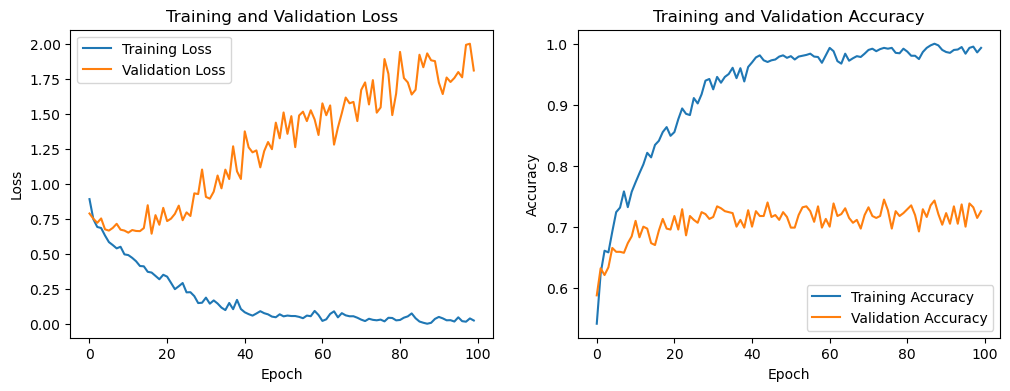

In [42]:
import matplotlib.pyplot as plt

# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [43]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Confusion Matrix:
[[ 97 112 102]
 [ 85  85 109]
 [107  98 105]]


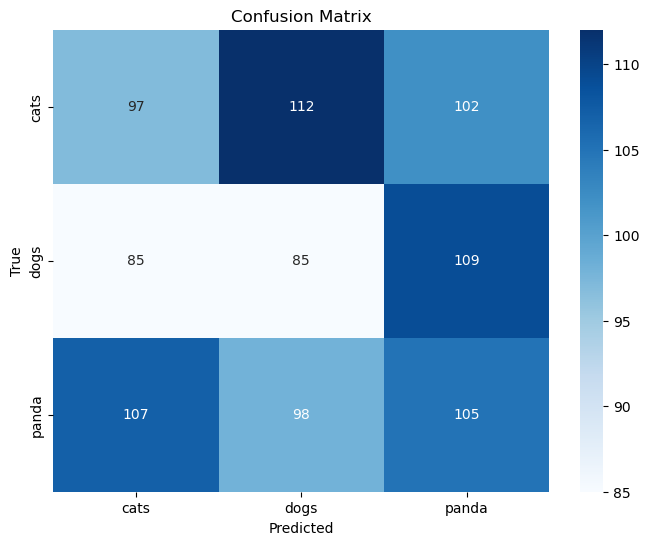

Classification Report:
              precision    recall  f1-score   support

        cats       0.34      0.31      0.32       311
        dogs       0.29      0.30      0.30       279
       panda       0.33      0.34      0.34       310

    accuracy                           0.32       900
   macro avg       0.32      0.32      0.32       900
weighted avg       0.32      0.32      0.32       900



In [44]:
predicted_classes = np.argmax(tes_pred, axis=1)
true_classes = test_set.classes

# Create a confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=training_set.class_indices.keys(), yticklabels=training_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=training_set.class_indices.keys()))

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the VGG-style model
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Flatten the output and add fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(len(training_set.class_indices), activation='softmax'))  # Adjust based on the number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                  

In [46]:
# history = model.fit(
#     training_set,
#     validation_data=validation_set,
#     epochs=10,
# )

In [47]:
# model.evaluate(test_set)

In [48]:
#Doing The Same for Flowers Dataset

In [49]:
data = 'flowers'

In [50]:
categories = os.listdir(data)

In [51]:
categories

['sunflower', 'daisy', 'rose', 'dandelion', 'tulip']

In [52]:
X, y = [], []

for category in categories:
    path = os.path.join(data, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        X.append(img_path)
        y.append(category)
        

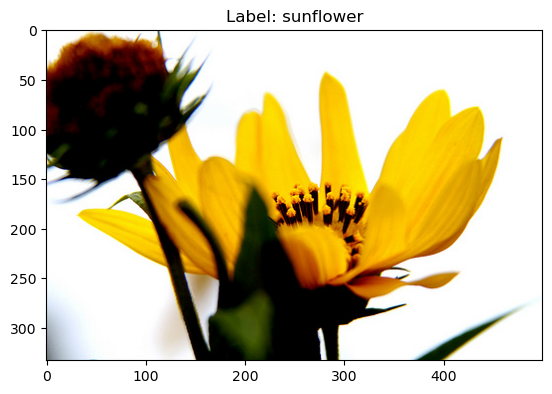

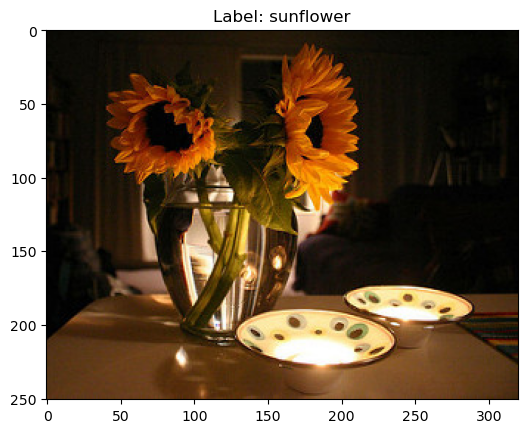

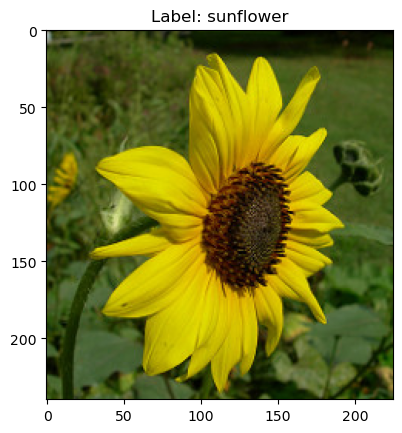

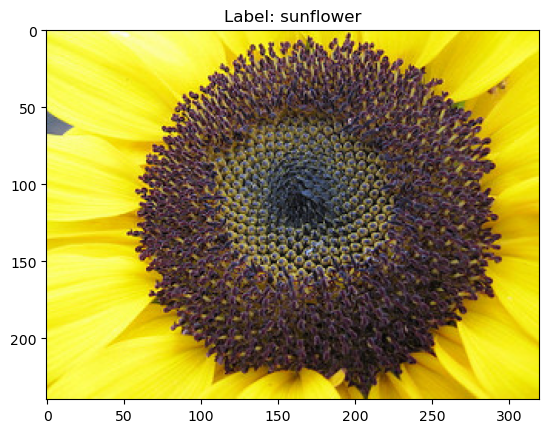

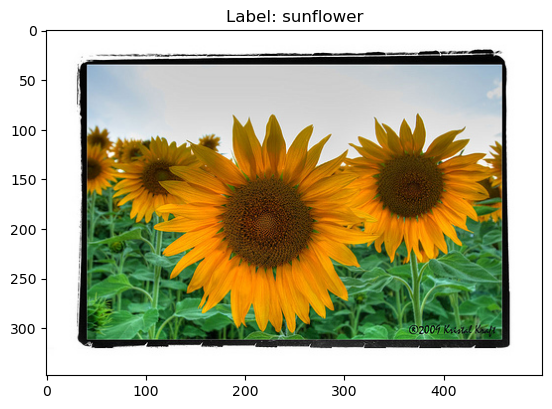

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Assuming you have already populated X and y
# X is a list of image paths, and y is a list of corresponding labels

# Display the first few images
num_images_to_display = 5

for i in range(num_images_to_display):
    img_path = X[i]
    label = y[i]

    # Load the image using Matplotlib
    img = mpimg.imread(img_path)

    # Display the image
    plt.imshow(img)
    plt.title(f'Label: {label}')
    plt.show()

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [57]:
train_df = pd.DataFrame({'FileName':X_train, 'Category':y_train})
test_df = pd.DataFrame({'FileName':X_test, 'Category':y_test})
val_df = pd.DataFrame({'FileName':X_val, 'Category':y_val})

In [58]:
from keras.preprocessing.image import ImageDataGenerator

In [59]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  shear_range=0.2,
                                  zoom_range=0.2)

In [60]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [61]:
training_set = train_datagen.flow_from_dataframe(train_df,
                                                x_col='FileName',
                                                y_col='Category',
                                                batch_size=32,
                                                class_mode='categorical',
                                                target_size=(64, 64))

Found 2114 validated image filenames belonging to 5 classes.


In [62]:
test_set = train_datagen.flow_from_dataframe(test_df,
                                                x_col='FileName',
                                                y_col='Category',
                                                batch_size=32,
                                                class_mode='categorical',
                                                target_size=(64, 64))

Found 1296 validated image filenames belonging to 5 classes.


In [63]:
validation_set = train_datagen.flow_from_dataframe(val_df,
                                                x_col='FileName',
                                                y_col='Category',
                                                batch_size=128,
                                                class_mode='categorical',
                                                target_size=(64, 64))

Found 907 validated image filenames belonging to 5 classes.


In [64]:
cnn = tf.keras.models.Sequential()

In [65]:
#convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32,
                              kernel_size=3,
                              activation='relu',
                              input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=64,
                              kernel_size=3,
                              activation='relu',
                              input_shape=[64,64,3]))

In [66]:
#pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                 strides=2))

In [67]:
#second convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32,
                              kernel_size=3,
                              activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                 strides=2))

In [68]:
#flattern
cnn.add(tf.keras.layers.Flatten())

In [69]:
#full connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
#output layer
cnn.add(tf.keras.layers.Dense(units=len(categories), activation='sigmoid'))

In [70]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
history=cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10


2023-11-21 10:01:19.417477: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


67/67 [==============================] - ETA: 0s - loss: 1.3495 - accuracy: 0.4035

2023-11-21 10:01:53.415903: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


67/67 [==============================] - 47s 696ms/step - loss: 1.3495 - accuracy: 0.4035 - val_loss: 1.1843 - val_accuracy: 0.4917
Epoch 2/10
67/67 [==============================] - 18s 265ms/step - loss: 1.1882 - accuracy: 0.4986 - val_loss: 1.1488 - val_accuracy: 0.5281
Epoch 3/10
67/67 [==============================] - 17s 258ms/step - loss: 1.0742 - accuracy: 0.5629 - val_loss: 1.0324 - val_accuracy: 0.5733
Epoch 4/10
67/67 [==============================] - 18s 262ms/step - loss: 0.9839 - accuracy: 0.6074 - val_loss: 1.0032 - val_accuracy: 0.6086
Epoch 5/10
67/67 [==============================] - 18s 274ms/step - loss: 0.9332 - accuracy: 0.6254 - val_loss: 1.0685 - val_accuracy: 0.5888
Epoch 6/10
67/67 [==============================] - 19s 277ms/step - loss: 0.9690 - accuracy: 0.6230 - val_loss: 1.0497 - val_accuracy: 0.5976
Epoch 7/10
67/67 [==============================] - 20s 303ms/step - loss: 0.8874 - accuracy: 0.6509 - val_loss: 1.0086 - val_accuracy: 0.5877
Epoch 8/10

In [72]:
cnn.evaluate(test_set)

 1/41 [..............................] - ETA: 6s - loss: 0.8896 - accuracy: 0.6562

2023-11-21 10:06:45.799410: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


41/41 [==============================] - 22s 545ms/step - loss: 0.9403 - accuracy: 0.6497


[0.940265417098999, 0.6496913433074951]

In [73]:
tes_pred=cnn.predict(test_set)

 1/41 [..............................] - ETA: 7s

2023-11-21 10:07:26.918788: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


41/41 [==============================] - 5s 128ms/step


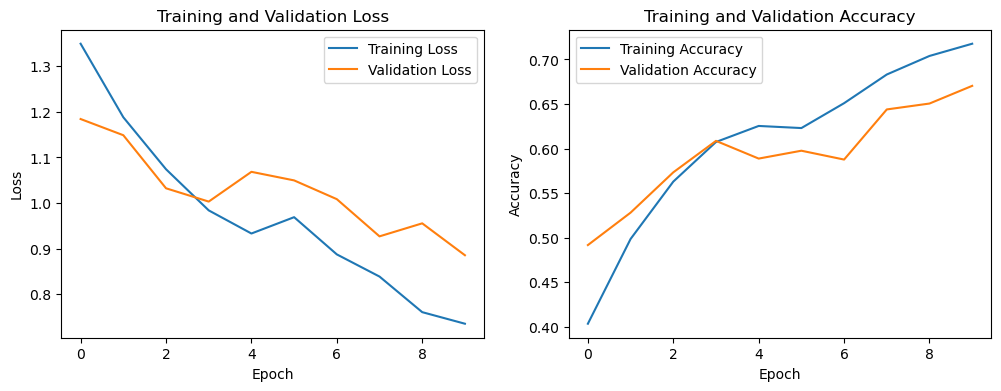

In [74]:
import matplotlib.pyplot as plt

# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Confusion Matrix:
[[39 68 34 37 65]
 [42 82 45 49 86]
 [39 62 31 36 65]
 [40 72 26 42 54]
 [48 84 38 46 66]]


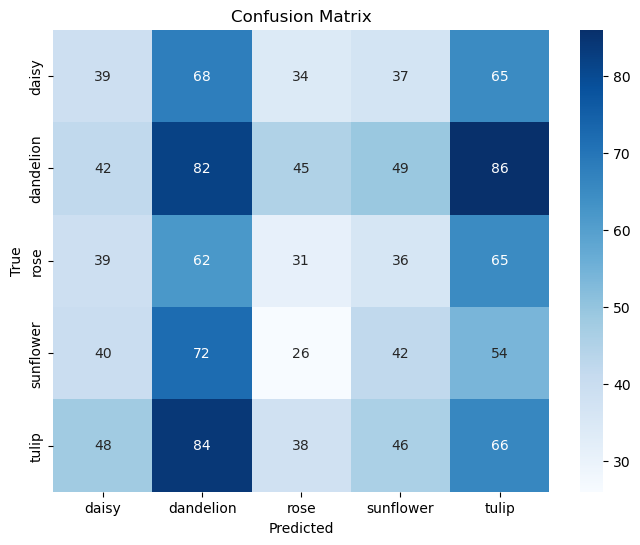

Classification Report:
              precision    recall  f1-score   support

       daisy       0.19      0.16      0.17       243
   dandelion       0.22      0.27      0.24       304
        rose       0.18      0.13      0.15       233
   sunflower       0.20      0.18      0.19       234
       tulip       0.20      0.23      0.21       282

    accuracy                           0.20      1296
   macro avg       0.20      0.20      0.19      1296
weighted avg       0.20      0.20      0.20      1296



In [75]:
predicted_classes = np.argmax(tes_pred, axis=1)
true_classes = test_set.classes

# Create a confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=training_set.class_indices.keys(), yticklabels=training_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=training_set.class_indices.keys()))

In [101]:
#MODIFYING HYPERPARAMETERS FOR ANIMALS

In [102]:
data = 'animals'
categories = os.listdir(data)
X, y = [], []

for category in categories:
    path = os.path.join(data, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        X.append(img_path)
        y.append(category)
        
        

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
train_df = pd.DataFrame({'FileName':X_train, 'Category':y_train})
test_df = pd.DataFrame({'FileName':X_test, 'Category':y_test})
val_df = pd.DataFrame({'FileName':X_val, 'Category':y_val})


In [104]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  shear_range=0.2,
                                  zoom_range=0.2)

In [105]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [106]:
training_set = train_datagen.flow_from_dataframe(train_df,
                                                x_col='FileName',
                                                y_col='Category',
                                                batch_size=32,
                                                class_mode='categorical',
                                                target_size=(64, 64))

Found 2430 validated image filenames belonging to 3 classes.


In [107]:
test_set = train_datagen.flow_from_dataframe(test_df,
                                                x_col='FileName',
                                                y_col='Category',
                                                batch_size=32,
                                                class_mode='categorical',
                                                target_size=(64, 64))

Found 300 validated image filenames belonging to 3 classes.


In [108]:
validation_set = train_datagen.flow_from_dataframe(val_df,
                                                x_col='FileName',
                                                y_col='Category',
                                                batch_size=512,
                                                class_mode='categorical',
                                                target_size=(64, 64))

Found 270 validated image filenames belonging to 3 classes.


In [109]:
cnn = tf.keras.models.Sequential()

In [110]:
#convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=64,
                              kernel_size=3,
                              activation='relu',
                              input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,
                              kernel_size=3,
                              activation='relu',
                              input_shape=[64,64,3]))

In [111]:
#pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                 strides=2))

In [112]:
#second convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32,
                              kernel_size=3,
                              activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                 strides=2))

In [113]:
#flattern
cnn.add(tf.keras.layers.Flatten())

In [114]:
#full connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
#output layer
cnn.add(tf.keras.layers.Dense(units=len(categories), activation='softmax'))

In [115]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [124]:
history=cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10


2023-11-21 10:28:32.201859: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


76/76 [==============================] - ETA: 0s - loss: 0.4518 - accuracy: 0.7963

2023-11-21 10:29:12.658213: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


76/76 [==============================] - 42s 552ms/step - loss: 0.4518 - accuracy: 0.7963 - val_loss: 0.6110 - val_accuracy: 0.7074
Epoch 2/10
76/76 [==============================] - 39s 506ms/step - loss: 0.4276 - accuracy: 0.8111 - val_loss: 0.8075 - val_accuracy: 0.6778
Epoch 3/10
76/76 [==============================] - 43s 567ms/step - loss: 0.4089 - accuracy: 0.8169 - val_loss: 0.7654 - val_accuracy: 0.6519
Epoch 4/10
76/76 [==============================] - 41s 541ms/step - loss: 0.3794 - accuracy: 0.8239 - val_loss: 0.6201 - val_accuracy: 0.6889
Epoch 5/10
76/76 [==============================] - 42s 555ms/step - loss: 0.3847 - accuracy: 0.8321 - val_loss: 0.7036 - val_accuracy: 0.7000
Epoch 6/10
76/76 [==============================] - 41s 539ms/step - loss: 0.3403 - accuracy: 0.8506 - val_loss: 0.8270 - val_accuracy: 0.7037
Epoch 7/10
76/76 [==============================] - 41s 538ms/step - loss: 0.3425 - accuracy: 0.8588 - val_loss: 0.7376 - val_accuracy: 0.6963
Epoch 8/10

In [125]:
cnn.evaluate(test_set)

2023-11-21 10:38:05.532164: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 2s 208ms/step - loss: 0.8537 - accuracy: 0.7367


[0.8536556959152222, 0.7366666793823242]

In [126]:
data = 'flowers'

In [127]:
categories = os.listdir(data)

In [128]:
X, y = [], []

for category in categories:
    path = os.path.join(data, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        X.append(img_path)
        y.append(category)
        

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [130]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=101)

In [131]:
train_df = pd.DataFrame({'FileName':X_train, 'Category':y_train})
test_df = pd.DataFrame({'FileName':X_test, 'Category':y_test})
val_df = pd.DataFrame({'FileName':X_val, 'Category':y_val})

In [132]:
from keras.preprocessing.image import ImageDataGenerator

In [133]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  shear_range=0.2,
                                  zoom_range=0.2)

In [134]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [135]:
training_set = train_datagen.flow_from_dataframe(train_df,
                                                x_col='FileName',
                                                y_col='Category',
                                                batch_size=16,
                                                class_mode='categorical',
                                                target_size=(64, 64))

Found 1554 validated image filenames belonging to 5 classes.


In [136]:
test_set = train_datagen.flow_from_dataframe(test_df,
                                                x_col='FileName',
                                                y_col='Category',
                                                batch_size=16,
                                                class_mode='categorical',
                                                target_size=(64, 64))

Found 1727 validated image filenames belonging to 5 classes.


In [137]:
validation_set = train_datagen.flow_from_dataframe(val_df,
                                                x_col='FileName',
                                                y_col='Category',
                                                batch_size=128,
                                                class_mode='categorical',
                                                target_size=(64, 64))

Found 1036 validated image filenames belonging to 5 classes.


In [138]:
cnn = tf.keras.models.Sequential()

In [139]:
#convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32,
                              kernel_size=3,
                              activation='relu',
                              input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,
                              kernel_size=3,
                              activation='relu',
                              input_shape=[64,64,3]))

In [140]:
#pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                 strides=2))

In [141]:
#second convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=64,
                              kernel_size=3,
                              activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                 strides=2))

In [142]:
#flattern
cnn.add(tf.keras.layers.Flatten())

In [143]:
#full connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
#output layer
cnn.add(tf.keras.layers.Dense(units=len(categories), activation='softmax'))

In [144]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [145]:
history=cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10


2023-11-21 10:43:40.619964: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


98/98 [==============================] - ETA: 0s - loss: 1.3717 - accuracy: 0.3867

2023-11-21 10:44:10.604020: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


98/98 [==============================] - 50s 501ms/step - loss: 1.3717 - accuracy: 0.3867 - val_loss: 1.2201 - val_accuracy: 0.4875
Epoch 2/10
98/98 [==============================] - 15s 149ms/step - loss: 1.2048 - accuracy: 0.4833 - val_loss: 1.1164 - val_accuracy: 0.5541
Epoch 3/10
98/98 [==============================] - 14s 144ms/step - loss: 1.0616 - accuracy: 0.5701 - val_loss: 1.0134 - val_accuracy: 0.5985
Epoch 4/10
98/98 [==============================] - 16s 161ms/step - loss: 0.9885 - accuracy: 0.6094 - val_loss: 0.9615 - val_accuracy: 0.6332
Epoch 5/10
98/98 [==============================] - 15s 150ms/step - loss: 0.8836 - accuracy: 0.6622 - val_loss: 1.0267 - val_accuracy: 0.6033
Epoch 6/10
98/98 [==============================] - 15s 150ms/step - loss: 0.8643 - accuracy: 0.6660 - val_loss: 0.9961 - val_accuracy: 0.6081
Epoch 7/10
98/98 [==============================] - 15s 149ms/step - loss: 0.8019 - accuracy: 0.6931 - val_loss: 1.0266 - val_accuracy: 0.6303
Epoch 8/10

In [146]:
cnn.evaluate(test_set)

  1/108 [..............................] - ETA: 9s - loss: 0.9909 - accuracy: 0.6250

2023-11-21 10:48:11.786105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


108/108 [==============================] - 31s 289ms/step - loss: 0.9567 - accuracy: 0.6398


[0.9566532373428345, 0.6398378610610962]